<a href="https://colab.research.google.com/github/njiririkinyanjui/Unsupervised_Learning_In_R/blob/main/Part_4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research question


Perform anomaly detection analysis on sales data and report any inconsistencies.


##Understanding context
* Carrefour Kenya seeks to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 
* Performing anomaly detection analysis on sales data . 


## Experimental Design

- Problem definition
- Data Loading
- Exploratory data analysis / Data Cleaning
- Implementation of the solution
- Conclusion

# Loading the Libraries

In [1]:
# Installing
install.packages("tibble")
# Loading
library("tibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data loading and cleaning

In [2]:
# Loading the Dataset

dt <- read.csv("/content/Supermarket_Sales_Forecasting - Sales.csv", header=TRUE,  stringsAsFactors = FALSE)

# forcing column names
colnames(dt) <- c("Date", "Sales")

# last row contains NA
#dt <- dt[complete.cases(dt),]

# creating an additional anomaly
(dt$Sales[19] = dt$Sales[19]*1.1)

class(dt)

[1] 189.4316

[1] "data.frame"

In [3]:
# Convert dt data to a tibble

dt1 <- as_tibble(dt)
class(dt1)

[1] "tbl_df"     "tbl"        "data.frame"

In [4]:
# Printing the dataset
dt1

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165
2/25/2019,433.6920
2/24/2019,772.3800
1/10/2019,76.1460


In [5]:
# Viewing the structure of the dataset
str(dt1)

tibble [1,000 × 2] (S3: tbl_df/tbl/data.frame)
 $ Date : chr [1:1000] "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num [1:1000] 549 80.2 340.5 489 634.4 ...


In [6]:
# Summary statistic of the dataset
summary(dt1)

     Date               Sales        
 Length:1000        Min.   :  10.68  
 Class :character   1st Qu.: 124.42  
 Mode  :character   Median : 253.85  
                    Mean   : 322.98  
                    3rd Qu.: 471.35  
                    Max.   :1042.65  

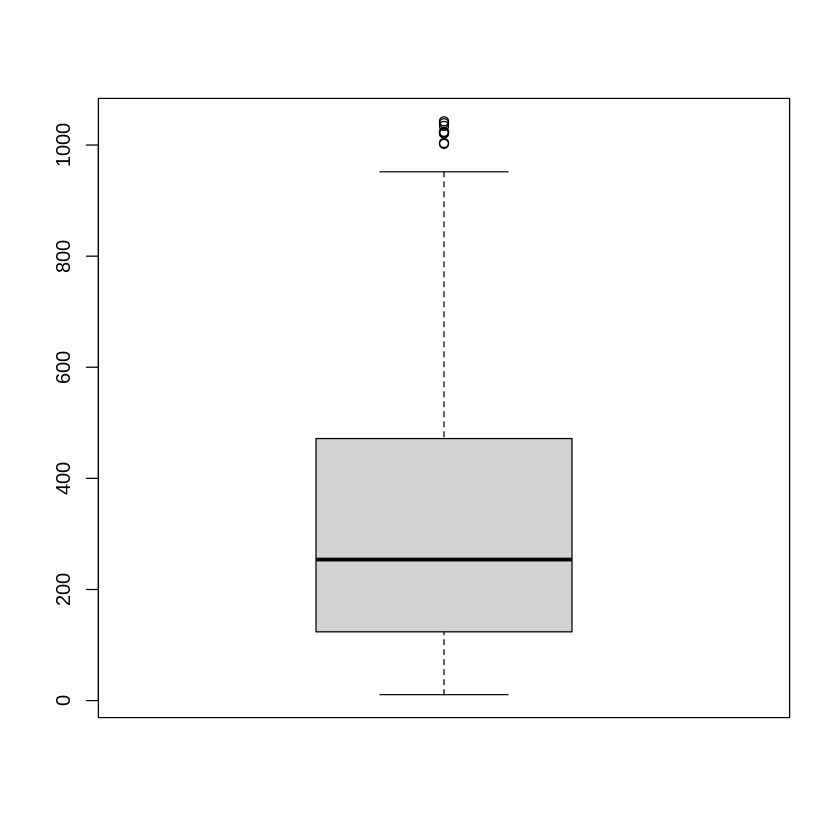

In [7]:
# This will help us to identify outliers. 
# We do need to be careful here though. 
# Our data is sequential and outliers are not always an anomaly.

names(dt1)[2]<-c('Sales')
boxplot(dt1$Sales)

* There appear to be two obvious outliers in our dataset, but the boxplot does not consider the time series aspect, which should not be ignored.

## Frequency Value computing

In [8]:
# computing main frequency value
install.packages("TSA")
library(TSA)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




[1] 5.181347

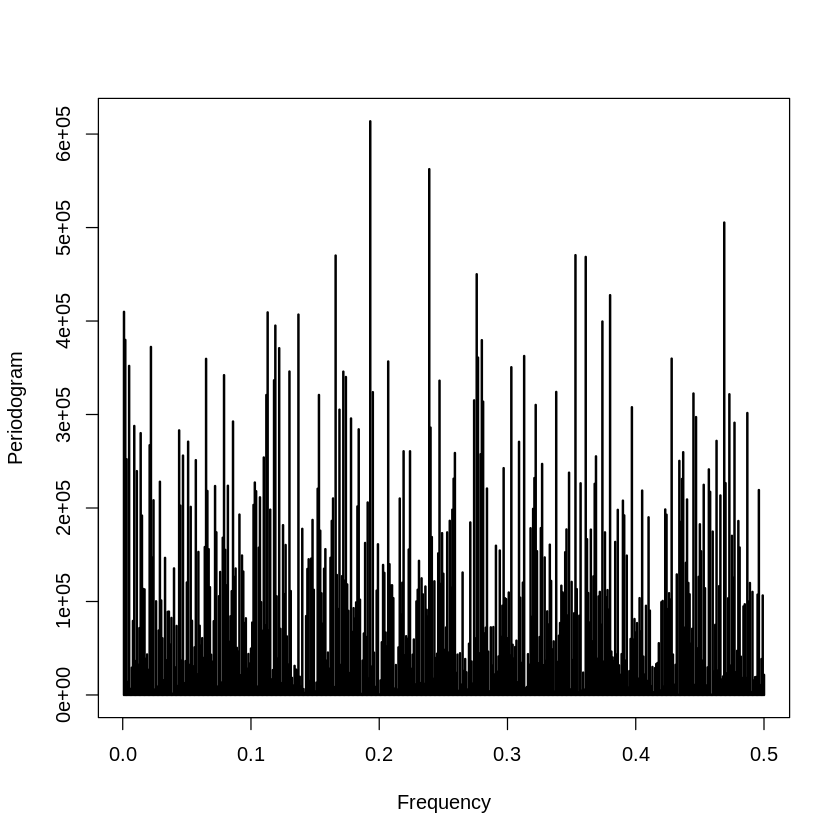

In [9]:
# computing main frequency value

sales.pdgram <- TSA::periodogram(dt1$Sales, plot=T) # plot=FALSE
max.freq <- which.max(sales.pdgram$spec)
(sales.frequency = 1/sales.pdgram$freq[max.freq])

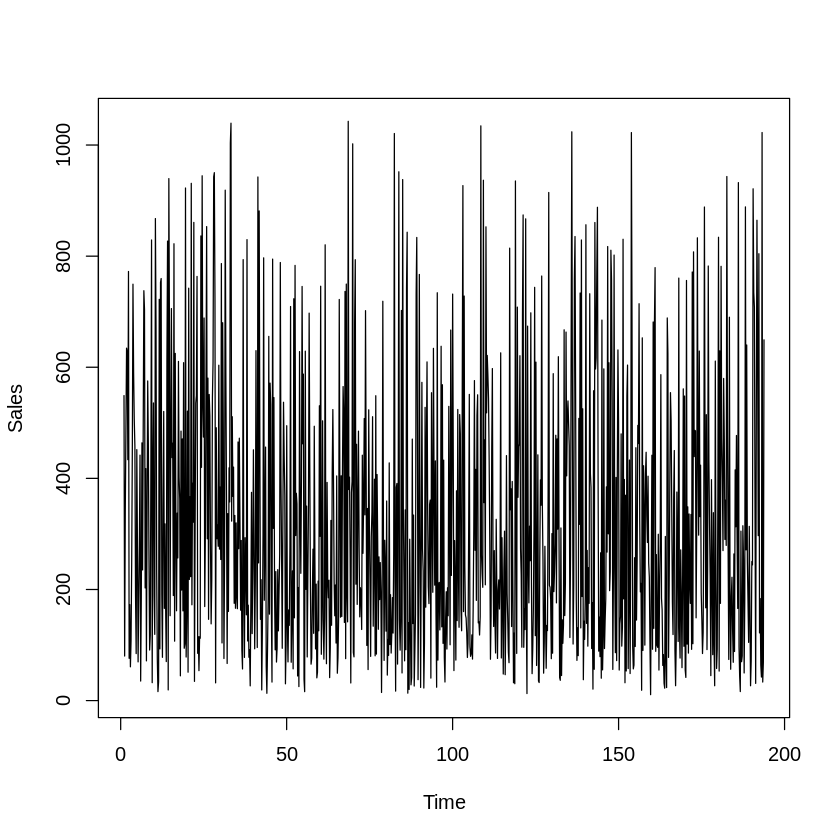

In [10]:
# Plot of the computed value
dt_ts <- ts(dt1[,2], frequency=sales.frequency)
plot(dt_ts)

## Using the AnomalyDetection tecnique

In [11]:
install.packages("devtools")
devtools::install_github("twitter/AnomalyDetection")
library(AnomalyDetection)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




colorspace (1.4-1 -> 2.0-0) [CRAN]
rstudioapi (0.11  -> 0.13 ) [CRAN]
waldo      (0.2.2 -> 0.2.3) [CRAN]


Installing 3 packages: colorspace, rstudioapi, waldo

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpYnISXu/remotes3818725ad6/twitter-AnomalyDetection-1f5deaa/DESCRIPTION’
─  preparing ‘AnomalyDetection’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘AnomalyDetection_1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$anoms
data frame with 0 columns and 0 rows

$plot
NULL

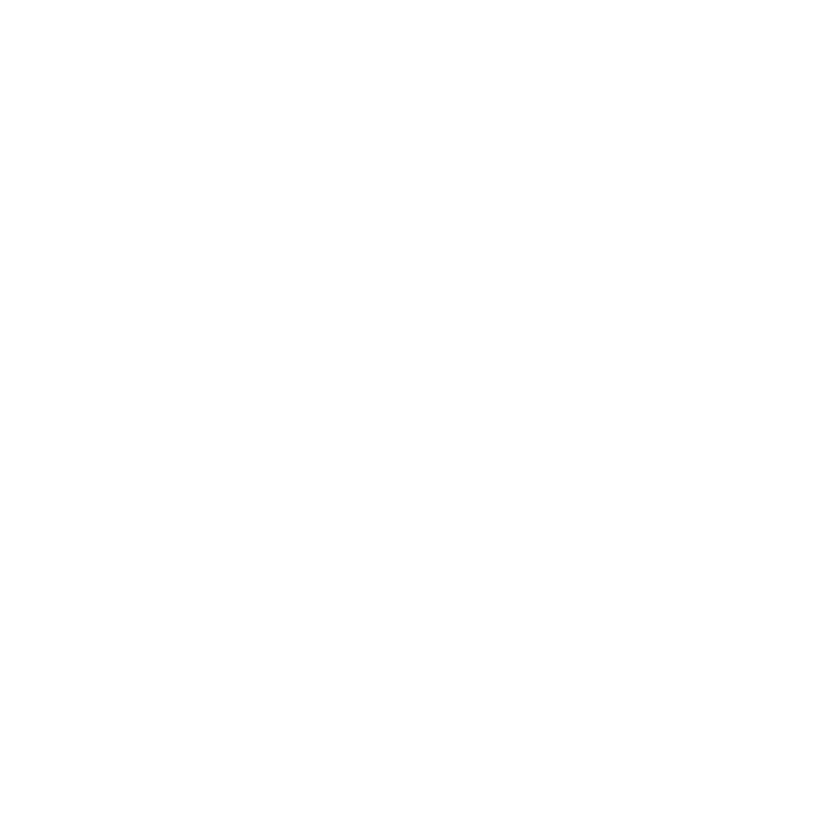

In [12]:
# Generalized Extreme Studentized Deviates (ESD) is a well established statistical procedure 
# for the detection of outliers where the assumption is that the inliers are normal distributed.
AnomalyDetectionVec(dt1$Sales, period=sales.frequency, direction='both',
                    longterm_period=NULL, plot=TRUE) 

$anoms
data frame with 0 columns and 0 rows

$plot
NULL

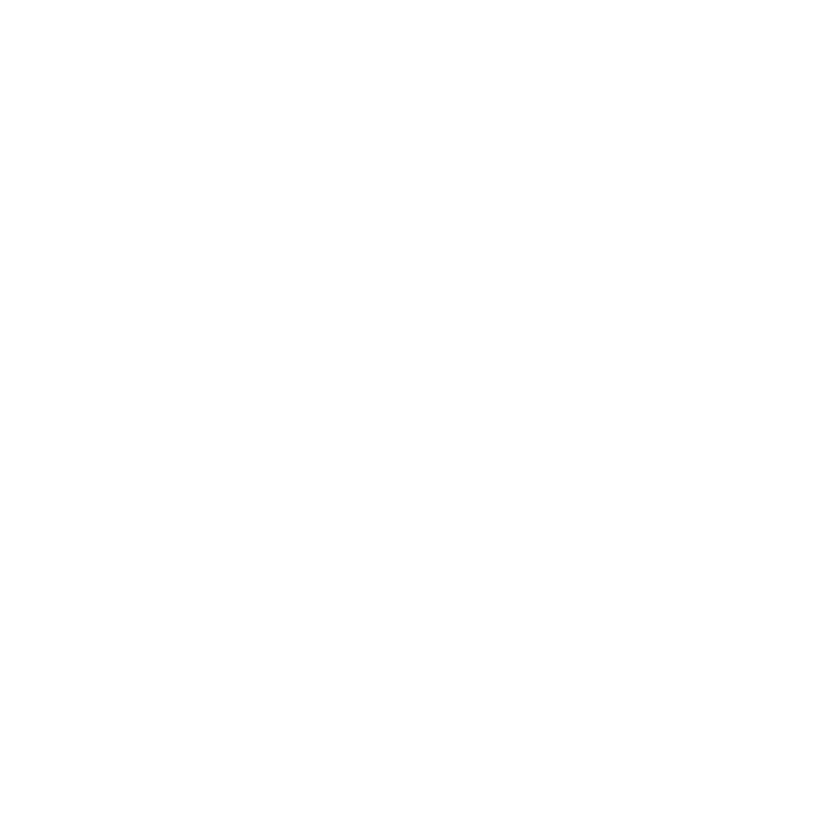

In [13]:
# To detect the local anomalies
AnomalyDetectionVec(dt1$Sales, period=sales.frequency, direction='both',
                    longterm_period=4*sales.frequency, plot=TRUE)

* There are no anomalies recorded

## USing ECP method

In [18]:
# Loading the ecp package

install.packages("ecp")
library(ecp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Rcpp



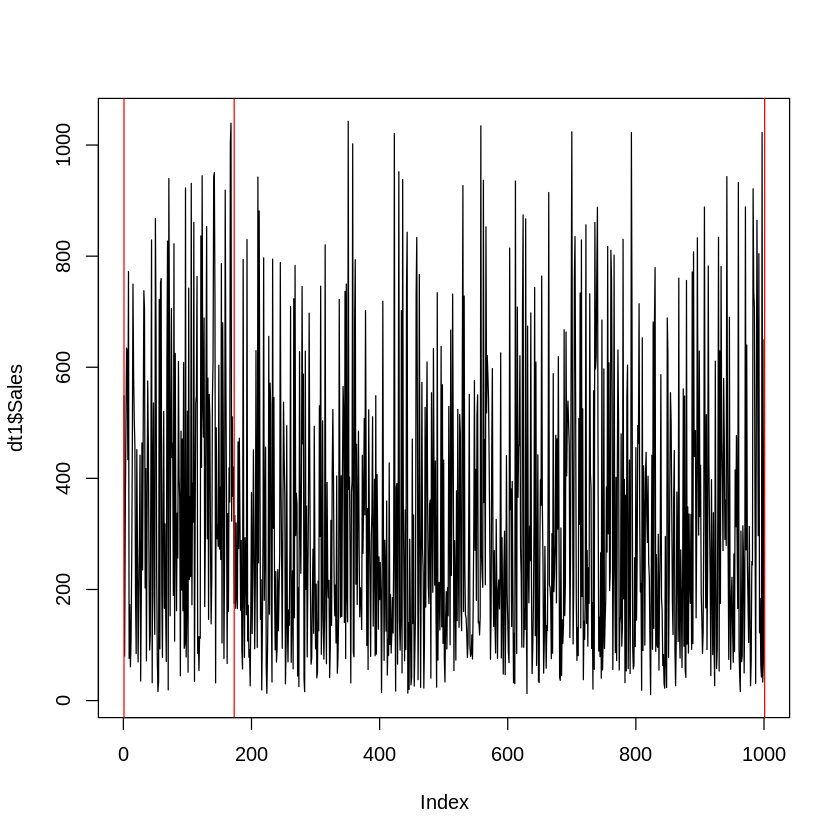

In [19]:
# The ecp package provides methods for change point analysis that are able to detect any type of distributional change within a time series.
mat_sales <- matrix(dt1$Sales, nrow=length(dt1$Sales), ncol=1)
ecp_fit <- e.divisive(X=mat_sales, min.size=5, sig.lvl=.1, alpha=2)
plot(dt1$Sales, type='l')
abline(v=ecp_fit$estimates, col='red')

* No anomalies in terms of distribution change have been detected. As default, the plot highlights beginning and end of the time series. 

# Conclusion

* Both the anomaly detection and ecp approach havent identified any anomality in the data (i.e.No anomalities detected)